In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Explore death rates from different resp diseases

In [2]:
filename = "us_chronic_resp_disease.csv"

In [3]:
disease = pd.read_csv(filename)


FileNotFoundError: [Errno 2] No such file or directory: 'us_chronic_resp_disease.csv'

## Basic information

In [ ]:
disease.info()

In [ ]:
disease.isna().any()

In [ ]:
# we drop FIPs
disease.drop('FIPS',axis=1,inplace=True)

## Explore how death rates from different types of diseases have changed over time

In [ ]:
# different types of diseases
disease.cause_name.unique()

There is missing data FIPs, otherwise it's fine

In [ ]:
causes = disease[['cause_name','year_id','mx']].groupby(['cause_name','year_id']).mean()

In [ ]:
all_causes = disease.cause_name.unique()

In [ ]:
all_causes

In [ ]:
ax = causes.xs('Asbestosis').plot(title='death rate by diseases',xlabel='year',ylabel='death rate')
for cause_name in all_causes[1:]:
    causes.xs(cause_name).plot(ax=ax,xlabel='year',ylabel='death rate')
ax.legend(all_causes,loc='lower right',bbox_to_anchor=(1.9, 0.2),fancybox=True)

# Sales per day

## General 

In [4]:
filename = "sales_per_day.csv"
sales = pd.read_csv(filename)

In [5]:
sales

Entity      Code  Year   amt
0        Armenia       ARM  1988  12.0
1        Armenia       ARM  1989  11.6
2        Armenia       ARM  1990  11.9
3        Armenia       ARM  1991   9.3
4        Armenia       ARM  1992   4.9
...          ...       ...   ...   ...
2762  Yugoslavia  OWID_YGS  1988   8.9
2763  Yugoslavia  OWID_YGS  1989   8.5
2764  Yugoslavia  OWID_YGS  1990   8.5
2765  Yugoslavia  OWID_YGS  1991   7.8
2766  Yugoslavia  OWID_YGS  1992   6.7

[2767 rows x 4 columns]

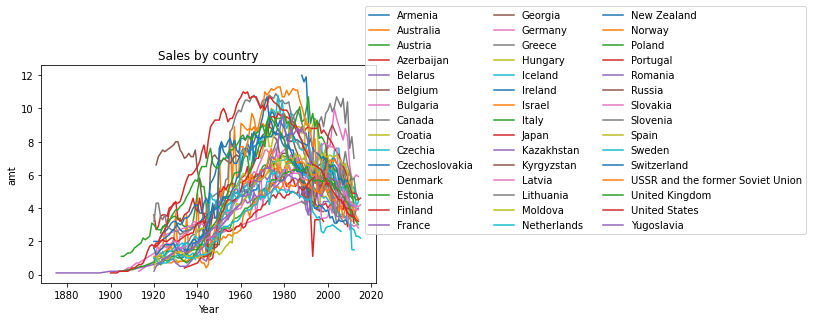

In [6]:
fig,ax = plt.subplots()
countries = sales.Entity.unique()
countries
for country in countries:
    sales.loc[sales.Entity==country].plot(x='Year',y='amt',ax=ax,title="Sales by country",ylabel='amt')
ax.legend(countries,loc='lower right',ncol=3,bbox_to_anchor=(2.3, 0.2),fancybox=True)


## HIC vs non-HIC

### Scraping world bank data

In [7]:

import requests
url = "https://data.worldbank.org/country/XD"
req = requests.get(url=url).content
from bs4 import BeautifulSoup
soup = BeautifulSoup(req)
HIC_elts = soup.findAll(class_='label')
HICs = []
for elt in HIC_elts:
    HICs.append(elt.text)

In [8]:
our_HICs = [x for x in countries if x in HICs]
not_HICs = [x for x in countries if x not in HICs]
print("# of all countries: ",len(countries))
print("HICs: ",len(our_HICs))
print("Below are the list of non-HICs: ")
print(not_HICs)

# of all countries:  45
HICs:  30
Below are the list of non-HICs: 
['Armenia', 'Azerbaijan', 'Belarus', 'Bulgaria', 'Czechia', 'Czechoslovakia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Romania', 'Russia', 'Slovakia', 'USSR and the former Soviet Union', 'Yugoslavia']


In [9]:
sales['HIC'] = sales.Entity.apply(lambda x: x in our_HICs)


### Making plots

In [10]:

sales_by_HIC = sales[['Year','HIC','amt']].groupby(['HIC','Year']).mean()
sales_by_HIC

amt
HIC   Year          
False 1913  0.200000
      1920  0.500000
      1921  0.950000
      1922  1.100000
      1923  1.475000
...              ...
True  2011  4.294737
      2012  3.981250
      2013  3.836364
      2014  3.630000
      2015  3.666667

[198 rows x 1 columns]

In [11]:
sales_by_HIC

amt
HIC   Year          
False 1913  0.200000
      1920  0.500000
      1921  0.950000
      1922  1.100000
      1923  1.475000
...              ...
True  2011  4.294737
      2012  3.981250
      2013  3.836364
      2014  3.630000
      2015  3.666667

[198 rows x 1 columns]

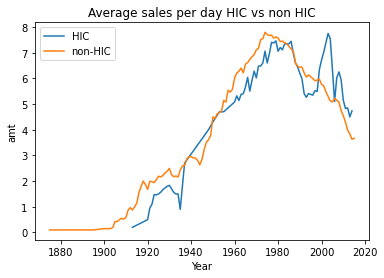

In [12]:
fig,ax = plt.subplots()
title = 'Average-sales-per-day-HIC-vs-non-HIC'
plt.title(title.replace("-"," "))
plt.ylabel("amt")
sales_by_HIC.xs(False).plot(ax=ax,label = 'HIC')
sales_by_HIC.xs(True).plot(ax=ax,label = 'non-HIC')
ax.legend(['HIC','non-HIC'])
plt.savefig(f'plots\{title}.jpg',bbox_inches ='tight')


# Tobacco production

## General

In [13]:
filename = "tobacco_production.csv"
production = pd.read_csv(filename)
production

Country or Area  Year         Unit         Value Value Footnotes
0            Albania  2006  Metric tons    546.600000             NaN
1            Albania  2006     Mil. USD      1.324113             NaN
2            Albania  2005  Metric tons   1878.500000             NaN
3            Albania  2005     Mil. USD      4.844285             NaN
4            Albania  2004  Metric tons    751.900000             NaN
...              ...   ...          ...           ...             ...
1203        Viet Nam  2004  Metric tons  12060.000000             NaN
1204        Viet Nam  2003  Metric tons   8817.000000             NaN
1205        Viet Nam  2002  Metric tons   6623.000000             NaN
1206        Viet Nam  2001  Metric tons   1944.000000             NaN
1207        Viet Nam  2000  Metric tons   1270.000000             NaN

[1208 rows x 5 columns]

### Clean up country names

In [14]:
production_countries = production['Country or Area'].unique()
production_countries

array(['Albania', 'Algeria', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cabo Verde', 'Cambodia', 'Canada', 'China',
       'China, Macao Special Administrative Region', 'Colombia',
       'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Ecuador', 'Egypt',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malta',
       'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
       'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Poland', 'Portugal', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia',
       'South Africa', 'Sweden', 'Switzerland', 'Syrian Arab Re

In [15]:
# countries with sales data but no production data
print([country for country in countries if country not in production_countries])

['Armenia', 'Belarus', 'Czechia', 'Czechoslovakia', 'Georgia', 'Israel', 'Moldova', 'Russia', 'Spain', 'USSR and the former Soviet Union', 'United States', 'Yugoslavia']


In [16]:
# countries with production data but no sales data
print([country for country in production_countries if country not in countries])

['Albania', 'Algeria', 'Bangladesh', 'Bosnia and Herzegovina', 'Brazil', 'Cabo Verde', 'Cambodia', 'China', 'China, Macao Special Administrative Region', 'Colombia', 'Cuba', 'Cyprus', 'Ecuador', 'Egypt', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Kenya', "Lao People's Democratic Republic", 'Lebanon', 'Luxembourg', 'Madagascar', 'Malawi', 'Malta', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Nepal', 'Nigeria', 'Republic of Moldova', 'Russian Federation', 'Serbia', 'South Africa', 'Syrian Arab Republic', 'Thailand', 'The former Yugoslav Republic of Macedonia', 'Tunisia', 'Turkey', 'Ukraine', 'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Viet Nam']


In [17]:
# some names are different but they refer to the same countries
name_map = {'United States of America': "United States",'Russian Federation':"Russia"}
my_map = {}
for country in production_countries:
    if country not in name_map:
        my_map[country]=country
    else:
        my_map[country] = name_map[country]

In [18]:
production['Country or Area'] = production['Country or Area'].map(my_map,na_action='keep')

In [19]:
production_countries = production['Country or Area'].unique()
production_countries

# countries with sales data but no production data
print([country for country in countries if country not in production_countries])

['Armenia', 'Belarus', 'Czechia', 'Czechoslovakia', 'Georgia', 'Israel', 'Moldova', 'Spain', 'USSR and the former Soviet Union', 'Yugoslavia']


### Clean up units

In [20]:
production.Unit.unique()

array(['Metric tons', 'Mil. USD'], dtype=object)

In [21]:
production_in_tons = production.loc[production.Unit=='Metric tons']
production_in_usd = production.loc[production.Unit=='Mil. USD']

## Worldwide production - trend

### Worldwide production in tons

In [22]:
df = production_in_tons[['Country or Area','Year','Value']]
df

Country or Area  Year    Value
0            Albania  2006    546.6
2            Albania  2005   1878.5
4            Albania  2004    751.9
6            Algeria  2015   7483.0
7            Algeria  2014   7648.0
...              ...   ...      ...
1203        Viet Nam  2004  12060.0
1204        Viet Nam  2003   8817.0
1205        Viet Nam  2002   6623.0
1206        Viet Nam  2001   1944.0
1207        Viet Nam  2000   1270.0

[803 rows x 3 columns]

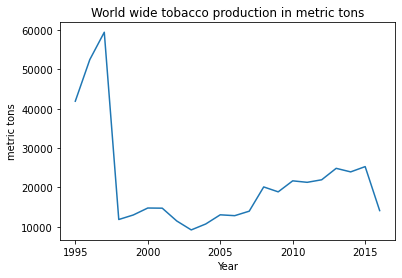

In [23]:
fig,ax = plt.subplots()
title = 'World wide tobacco production in metric tons'
plt.title(title)
plt.ylabel("metric tons")
df.groupby('Year').mean().plot(ax=ax,legend=False)
title = title.replace(" ","-")
plt.savefig(f'plots\{title}.jpg',bbox_inches ='tight')




### Worldwide production in USD

In [24]:

df = production_in_usd[['Country or Area','Year','Value']]

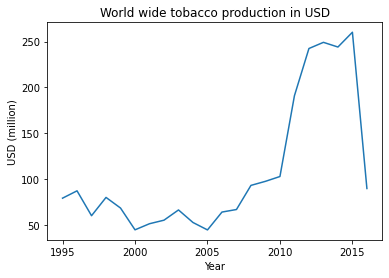

In [25]:
fig,ax = plt.subplots()
title = 'World wide tobacco production in USD'
plt.title(title)
plt.ylabel("USD (million)")
df.groupby('Year').mean().plot(ax=ax,legend=False)
title = title.replace(" ","-")
plt.savefig(f'plots\{title}.jpg',bbox_inches ='tight')

### Compare tons vs usd

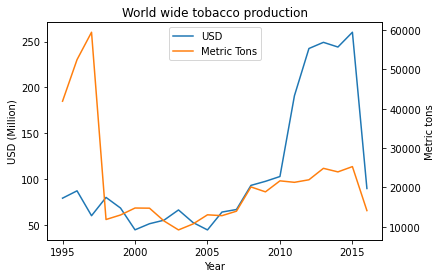

In [26]:
fig,ax = plt.subplots()

title = 'World wide tobacco production'
plt.title(title)

df = production_in_usd[['Country or Area','Year','Value']]
df.groupby('Year').mean().plot(ax=ax,label="Metric tons")
ax.set_ylabel("USD (Million)")
df = production_in_tons[['Country or Area','Year','Value']]
df.groupby('Year').mean().plot(ax=ax,secondary_y=True,label="USD")
plt.ylabel("Metric tons")
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, ["USD","Metric Tons"],loc='upper center')

title = title.replace(" ","-")
plt.savefig(f'plots\{title}.jpg',bbox_inches ='tight')

# tobacco use worldwide by individual location

In [27]:
filename = "tobacco_use_ww.csv"
use = pd.read_csv(filename)

## Combine use & production

### AvgProdInTons

In [28]:
production_in_tons_avg = production_in_tons.groupby('Country or Area').mean().Value

In [29]:


production_in_tons_dict = production_in_tons_avg.to_dict()

In [30]:

use['AvgProdInTons'] = use['Location'].map(production_in_tons_dict)

### AvgProdInUSD

In [31]:

production_in_usd_avg = production_in_usd.groupby('Country or Area').mean().Value
production_in_usd_dict = production_in_usd_avg.to_dict()
use['AvgProdInUSD'] = use['Location'].map(production_in_usd_dict)

## Combine use & death rates 

In [32]:
filename = "death_rates_smoking_age.csv"
death = pd.read_csv(filename)
death = death.drop(columns = ["Under_5","5_14"]).dropna()
death

Entity Code  Year   All_ages       50_69      15_49      70_plus
0     Afghanistan  AFG  1990  63.895905  267.230009  16.589519   679.006755
1     Afghanistan  AFG  1991  61.846347  266.975516  15.456913   677.617648
2     Afghanistan  AFG  1992  53.436511  266.430053  12.767999   679.505810
3     Afghanistan  AFG  1993  47.044347  267.969428  11.000425   683.973588
4     Afghanistan  AFG  1994  45.799808  272.403687  10.738020   691.007773
...           ...  ...   ...        ...         ...        ...          ...
6463     Zimbabwe  ZWE  2013  66.609741  430.024361  24.046022  1275.647333
6464     Zimbabwe  ZWE  2014  63.983527  408.855801  22.964390  1220.939407
6465     Zimbabwe  ZWE  2015  62.211166  392.380248  22.393477  1174.938436
6466     Zimbabwe  ZWE  2016  60.644339  378.003366  21.768089  1124.960820
6467     Zimbabwe  ZWE  2017  59.228353  364.212515  21.188276  1078.220541

[5488 rows x 7 columns]

In [33]:

avg_death = death.groupby('Code').mean()
avg_death.drop('Year',axis=1,inplace=True)
death_dict = avg_death.to_dict()

In [34]:
for age_group in death_dict:
    d = death_dict[age_group]
    use[f'DR_{age_group}'] = use.SpatialDimValueCode.map(d)

In [35]:
use = use.dropna()

## Combine use & sales

In [36]:
sales = sales.dropna()

In [37]:
avg_sales = sales.groupby('Code').mean().amt
sales_dict = avg_sales.to_dict()

In [38]:
use['AvgSales'] = use.SpatialDimValueCode.map(sales_dict)

In [39]:
use = use.dropna()
use

ParentLocationCode   ParentLocation SpatialDimValueCode    Location  \
1                   EUR           Europe                 AZE  Azerbaijan   
29                  WPR  Western Pacific                 JPN       Japan   
49                  AMR         Americas                 CAN      Canada   
61                  EUR           Europe                 ISL     Iceland   
62                  EUR           Europe                 ISL     Iceland   
...                 ...              ...                 ...         ...   
3955                EUR           Europe                 AZE  Azerbaijan   
3957                EUR           Europe                 LVA      Latvia   
3959                EUR           Europe                 SWE      Sweden   
3969                EUR           Europe                 GRC      Greece   
3972                EUR           Europe                 BGR    Bulgaria   

      Year      Gender  Value  AvgProdInTons  AvgProdInUSD  DR_All_ages  \
1     2018      Female    0.2    4199.268182      4.609049   105.697292   
29    2018      Female   10.5      24.250000      3.023433   147.846504   
49    2018      Female   12.4    6501.500000    101.340983   161.107440   
61    2018      Female   13.7       0.000000      0.000000   124.162013   
62    2018  Both sexes   13.8       0.000000      0.000000   124.162013   
...    ...         ...    ...            ...           ...          ...   
3955  2000        Male   55.9    4199.268182      4.609049   105.697292   
3957  2000        Male   56.4       0.000000      0.000000   217.264896   
3959  2000      Female   56.6    8473.104545    387.138754   170.855748   
3969  2000        Male   58.6    5873.881692     33.432205   213.110344   
3972  2000        Male   59.9   35820.789474    121.237752   293.323635   

        DR_50_69   DR_15_49   DR_70_plus  AvgSales  
1     431.861953  25.134131  1062.828277  3.727273  
29    170.413228  10.686011   780.858257  5.639583  
49    251.106019  12.506896  1135.769294  6.051648  
61    199.773147   9.608936  1028.673278  4.354762  
62    199.773147   9.608936  1028.673278  4.354762  
...          ...        ...          ...       ...  
3955  431.861953  25.134131  1062.828277  3.727273  
3957  475.129292  36.412215   825.047278  3.314286  
3959  186.358120   7.647617   965.241451  2.950575  
3969  302.632929  21.300328  1118.815472  6.024731  
3972  557.153914  46.010982  1177.096012  5.727586  

[702 rows x 14 columns]

# tobacco use worldwide by parent location

In [40]:
parent = use.ParentLocationCode.copy()

## Combine use & production

### AvgProdInTons

In [41]:
parent['AvgProdInTons'] = parent['Location'].map(production_in_tons_dict)

KeyError: 'Location'

### AvgProdInUSD

In [42]:
production_in_usd_avg = production_in_usd.groupby('Country or Area').mean().Value
production_in_usd_dict = production_in_usd_avg.to_dict()
parent['AvgProdInUSD'] = parent['Location'].map(production_in_usd_dict)

KeyError: 'Location'

## Combine use & death rates 

In [43]:
filename = "death_rates_smoking_age.csv"
death = pd.read_csv(filename)
death = death.drop(columns = ["Under_5","5_14"])

In [44]:
avg_death = death.groupby('Code').mean()
avg_death.drop('Year',axis=1,inplace=True)
death_dict = avg_death.to_dict()

In [45]:
for age_group in death_dict:
    d = death_dict[age_group]
    use[f'DR_{age_group}'] = use.SpatialDimValueCode.map(d)

## Combine use & sales

In [46]:
sales

Entity      Code  Year   amt    HIC
0        Armenia       ARM  1988  12.0  False
1        Armenia       ARM  1989  11.6  False
2        Armenia       ARM  1990  11.9  False
3        Armenia       ARM  1991   9.3  False
4        Armenia       ARM  1992   4.9  False
...          ...       ...   ...   ...    ...
2762  Yugoslavia  OWID_YGS  1988   8.9  False
2763  Yugoslavia  OWID_YGS  1989   8.5  False
2764  Yugoslavia  OWID_YGS  1990   8.5  False
2765  Yugoslavia  OWID_YGS  1991   7.8  False
2766  Yugoslavia  OWID_YGS  1992   6.7  False

[2722 rows x 5 columns]

In [47]:
avg_sales = sales.groupby('Code').mean().amt
sales_dict = avg_sales.to_dict()

In [48]:
use['AvgSales'] = use.SpatialDimValueCode.map(sales_dict)

In [49]:
use = use.reset_index().drop(columns = ["index"])
use

ParentLocationCode   ParentLocation SpatialDimValueCode    Location  Year  \
0                  EUR           Europe                 AZE  Azerbaijan  2018   
1                  WPR  Western Pacific                 JPN       Japan  2018   
2                  AMR         Americas                 CAN      Canada  2018   
3                  EUR           Europe                 ISL     Iceland  2018   
4                  EUR           Europe                 ISL     Iceland  2018   
..                 ...              ...                 ...         ...   ...   
697                EUR           Europe                 AZE  Azerbaijan  2000   
698                EUR           Europe                 LVA      Latvia  2000   
699                EUR           Europe                 SWE      Sweden  2000   
700                EUR           Europe                 GRC      Greece  2000   
701                EUR           Europe                 BGR    Bulgaria  2000   

         Gender  Value  AvgProdInTons  AvgProdInUSD  DR_All_ages    DR_50_69  \
0        Female    0.2    4199.268182      4.609049   105.697292  431.861953   
1        Female   10.5      24.250000      3.023433   147.846504  170.413228   
2        Female   12.4    6501.500000    101.340983   161.107440  251.106019   
3        Female   13.7       0.000000      0.000000   124.162013  199.773147   
4    Both sexes   13.8       0.000000      0.000000   124.162013  199.773147   
..          ...    ...            ...           ...          ...         ...   
697        Male   55.9    4199.268182      4.609049   105.697292  431.861953   
698        Male   56.4       0.000000      0.000000   217.264896  475.129292   
699      Female   56.6    8473.104545    387.138754   170.855748  186.358120   
700        Male   58.6    5873.881692     33.432205   213.110344  302.632929   
701        Male   59.9   35820.789474    121.237752   293.323635  557.153914   

      DR_15_49   DR_70_plus  AvgSales  
0    25.134131  1062.828277  3.727273  
1    10.686011   780.858257  5.639583  
2    12.506896  1135.769294  6.051648  
3     9.608936  1028.673278  4.354762  
4     9.608936  1028.673278  4.354762  
..         ...          ...       ...  
697  25.134131  1062.828277  3.727273  
698  36.412215   825.047278  3.314286  
699   7.647617   965.241451  2.950575  
700  21.300328  1118.815472  6.024731  
701  46.010982  1177.096012  5.727586  

[702 rows x 14 columns]

In [50]:
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

from sklearn.preprocessing import OneHotEncoder

In [51]:
enc = OneHotEncoder(handle_unknown='ignore')
rt = use.copy()
X = rt[['ParentLocationCode']]
X = enc.fit_transform(X).toarray()
columns = enc.categories_[0]
rt = pd.DataFrame(data = X,columns = columns)
use = use.merge(rt,left_index = True,right_index = True)


In [52]:

use

ParentLocationCode   ParentLocation SpatialDimValueCode    Location  Year  \
0                  EUR           Europe                 AZE  Azerbaijan  2018   
1                  WPR  Western Pacific                 JPN       Japan  2018   
2                  AMR         Americas                 CAN      Canada  2018   
3                  EUR           Europe                 ISL     Iceland  2018   
4                  EUR           Europe                 ISL     Iceland  2018   
..                 ...              ...                 ...         ...   ...   
697                EUR           Europe                 AZE  Azerbaijan  2000   
698                EUR           Europe                 LVA      Latvia  2000   
699                EUR           Europe                 SWE      Sweden  2000   
700                EUR           Europe                 GRC      Greece  2000   
701                EUR           Europe                 BGR    Bulgaria  2000   

         Gender  Value  AvgProdInTons  AvgProdInUSD  DR_All_ages    DR_50_69  \
0        Female    0.2    4199.268182      4.609049   105.697292  431.861953   
1        Female   10.5      24.250000      3.023433   147.846504  170.413228   
2        Female   12.4    6501.500000    101.340983   161.107440  251.106019   
3        Female   13.7       0.000000      0.000000   124.162013  199.773147   
4    Both sexes   13.8       0.000000      0.000000   124.162013  199.773147   
..          ...    ...            ...           ...          ...         ...   
697        Male   55.9    4199.268182      4.609049   105.697292  431.861953   
698        Male   56.4       0.000000      0.000000   217.264896  475.129292   
699      Female   56.6    8473.104545    387.138754   170.855748  186.358120   
700        Male   58.6    5873.881692     33.432205   213.110344  302.632929   
701        Male   59.9   35820.789474    121.237752   293.323635  557.153914   

      DR_15_49   DR_70_plus  AvgSales  AMR  EUR  WPR  
0    25.134131  1062.828277  3.727273  0.0  1.0  0.0  
1    10.686011   780.858257  5.639583  0.0  0.0  1.0  
2    12.506896  1135.769294  6.051648  1.0  0.0  0.0  
3     9.608936  1028.673278  4.354762  0.0  1.0  0.0  
4     9.608936  1028.673278  4.354762  0.0  1.0  0.0  
..         ...          ...       ...  ...  ...  ...  
697  25.134131  1062.828277  3.727273  0.0  1.0  0.0  
698  36.412215   825.047278  3.314286  0.0  1.0  0.0  
699   7.647617   965.241451  2.950575  0.0  1.0  0.0  
700  21.300328  1118.815472  6.024731  0.0  1.0  0.0  
701  46.010982  1177.096012  5.727586  0.0  1.0  0.0  

[702 rows x 17 columns]

In [53]:
enc = OneHotEncoder(handle_unknown='ignore')
rt = use.copy()
X = rt[['Gender']]
X = enc.fit_transform(X).toarray()
columns = enc.categories_[0]
rt = pd.DataFrame(data = X,columns = columns)
use = use.merge(rt,left_index = True,right_index = True)



AMR,EUR, and WPR corresponds to ParentLocationCode


In [54]:
use = use.drop(columns = ["ParentLocationCode","ParentLocation","SpatialDimValueCode","Location","Gender"])

In [55]:
features = use.drop(columns = ["Value"])

In [56]:
features

Year  AvgProdInTons  AvgProdInUSD  DR_All_ages    DR_50_69   DR_15_49  \
0    2018    4199.268182      4.609049   105.697292  431.861953  25.134131   
1    2018      24.250000      3.023433   147.846504  170.413228  10.686011   
2    2018    6501.500000    101.340983   161.107440  251.106019  12.506896   
3    2018       0.000000      0.000000   124.162013  199.773147   9.608936   
4    2018       0.000000      0.000000   124.162013  199.773147   9.608936   
..    ...            ...           ...          ...         ...        ...   
697  2000    4199.268182      4.609049   105.697292  431.861953  25.134131   
698  2000       0.000000      0.000000   217.264896  475.129292  36.412215   
699  2000    8473.104545    387.138754   170.855748  186.358120   7.647617   
700  2000    5873.881692     33.432205   213.110344  302.632929  21.300328   
701  2000   35820.789474    121.237752   293.323635  557.153914  46.010982   

      DR_70_plus  AvgSales  AMR  EUR  WPR  Both sexes  Female  Male  
0    1062.828277  3.727273  0.0  1.0  0.0         0.0     1.0   0.0  
1     780.858257  5.639583  0.0  0.0  1.0         0.0     1.0   0.0  
2    1135.769294  6.051648  1.0  0.0  0.0         0.0     1.0   0.0  
3    1028.673278  4.354762  0.0  1.0  0.0         0.0     1.0   0.0  
4    1028.673278  4.354762  0.0  1.0  0.0         1.0     0.0   0.0  
..           ...       ...  ...  ...  ...         ...     ...   ...  
697  1062.828277  3.727273  0.0  1.0  0.0         0.0     0.0   1.0  
698   825.047278  3.314286  0.0  1.0  0.0         0.0     0.0   1.0  
699   965.241451  2.950575  0.0  1.0  0.0         0.0     1.0   0.0  
700  1118.815472  6.024731  0.0  1.0  0.0         0.0     0.0   1.0  
701  1177.096012  5.727586  0.0  1.0  0.0         0.0     0.0   1.0  

[702 rows x 14 columns]

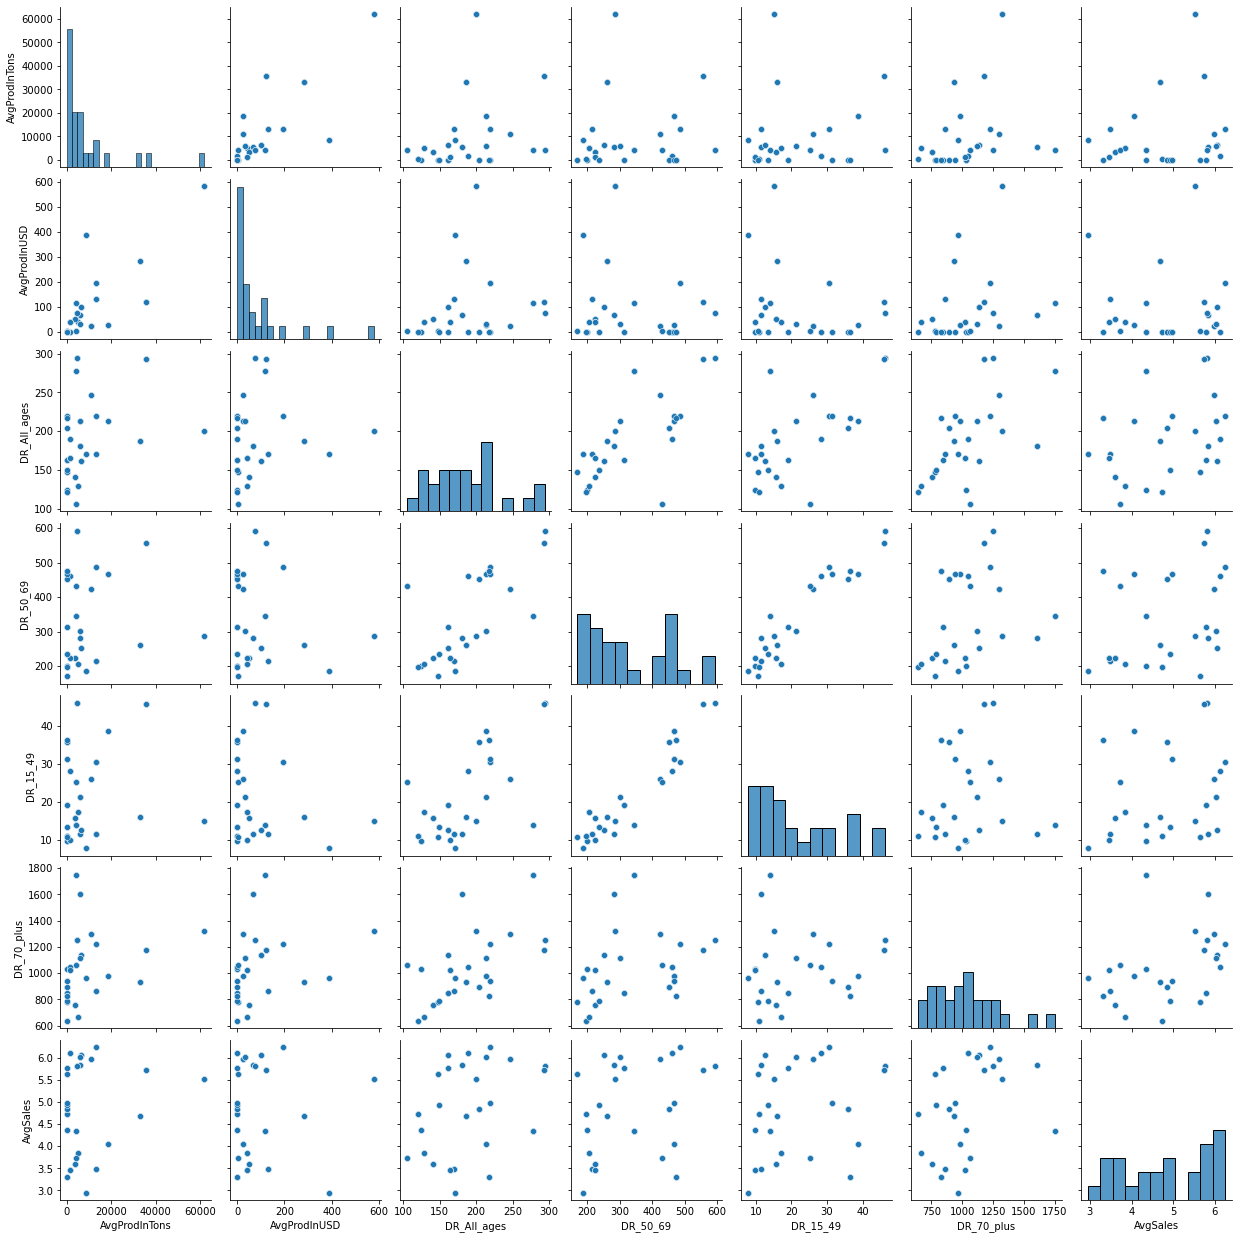

In [57]:
sns.pairplot(features.loc[:,"AvgProdInTons":"AvgSales"])

In [58]:
feature_centered = (features - np.mean(features,axis = 0))/np.std(features,axis = 0)
u,s,vt = np.linalg.svd(feature_centered,full_matrices = False)
pcs = pd.DataFrame(u*s)

In [59]:
pcs

0         1         2         3         4         5        6   \
0    0.456123 -1.244457 -0.496457  1.664101  0.480384 -0.354921 -1.06066   
1    3.904118  3.139308 -1.945010  1.664101  0.480384  3.651848 -1.06066   
2    2.160720  4.774365 -0.638063  1.664101  0.480384 -3.173649 -1.06066   
3    1.754583 -0.919984  0.145845  1.664101  0.480384 -0.530012 -1.06066   
4    1.754583 -0.919984  0.145845 -1.248075  1.200961 -0.530012 -1.06066   
..        ...       ...       ...       ...       ...       ...      ...   
697  0.456123 -1.244457 -0.496457 -0.416025 -1.681346 -0.354921  2.12132   
698 -0.777561 -1.456787 -1.293058 -0.416025 -1.681346  0.068604  2.12132   
699  1.364719 -0.835688  2.499308  1.664101  0.480384  0.032017  2.12132   
700 -0.489173  0.265791 -0.354284 -0.416025 -1.681346 -0.133147  2.12132   
701 -3.734196  0.845110 -0.105102 -0.416025 -1.681346  0.805417  2.12132   

           7         8         9         10        11            12  \
0    0.316559 -0.248720  1.720224 -0.230270 -0.087683 -6.464162e-16   
1   -0.409302 -0.540524  0.110427 -0.023203 -0.000991  7.105399e-16   
2    1.397732 -0.318205 -0.035833  0.026632 -0.000769  5.492051e-16   
3   -0.807388  0.268444  0.359804  0.207433  0.129058 -2.008443e-15   
4   -0.807388  0.268444  0.359804  0.207433  0.129058  5.554688e-16   
..        ...       ...       ...       ...       ...           ...   
697  0.316559 -0.248720  1.720224 -0.230270 -0.087683  2.911757e-17   
698  1.130237 -1.206801 -0.059180 -0.073096 -0.076142 -4.603921e-17   
699  0.195833 -1.193975 -0.500236 -1.005402  0.088915  3.065350e-17   
700 -0.845004  0.780195 -0.528250  0.186901  0.193143  4.362746e-17   
701  1.029339  0.022944 -0.094917  0.725624  0.033143 -3.305924e-17   

               13  
0   -1.656018e-16  
1   -7.071210e-16  
2    2.148527e-15  
3   -1.197252e-16  
4   -9.395353e-16  
..            ...  
697 -3.609595e-16  
698  8.205799e-17  
699 -2.176534e-16  
700  4.114574e-16  
701 -4.700269e-17  

[702 rows x 14 columns]

Text(0.5, 1.0, 'Fraction of Variance Explained by each Principal Component')

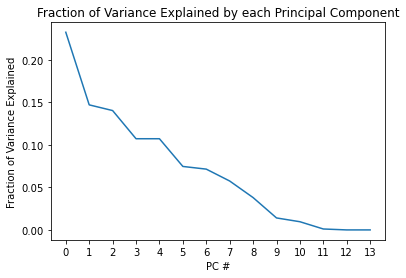

In [60]:
plt.plot(range(14), s**2 / sum(s**2));
plt.xticks(range(14), range(14));
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Fraction of Variance Explained by each Principal Component')

In [61]:
y = use.loc[:,["Value"]]
#add some random noise to help distinguish each point
pc2 =  pcs.loc[:,0:2]
x = pc2 + np.random.normal(0, 0.1, size = (len(pcs.loc[:,0:2]),3))
pc_clu = y.merge(x,left_index = True,right_index = True)

In [62]:
pip install plotly==5.4.0

Note: you may need to restart the kernel to use updated packages.


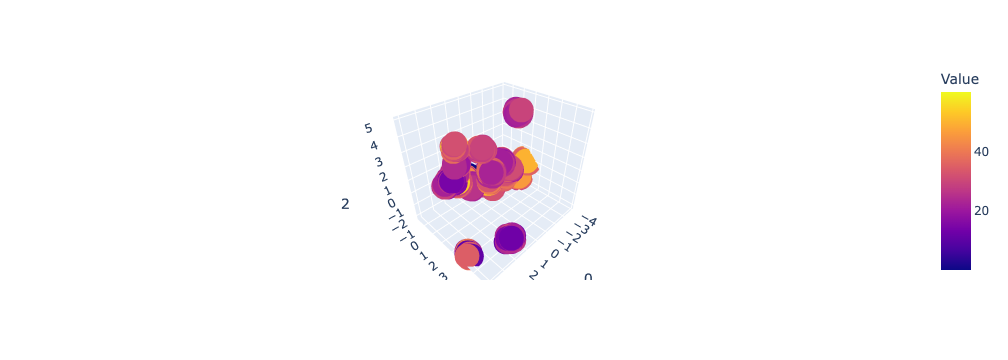

In [63]:
import plotly
plotly.__version__
import plotly.express as px
px.scatter_3d(pc_clu,x=0,y=1,z=2,color = pc_clu["Value"])

<AxesSubplot:xlabel='0', ylabel='1'>

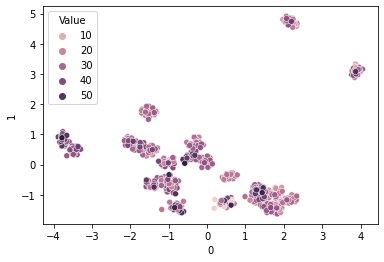

In [64]:
sns.scatterplot(data = pc_clu,y = 1,x = 0,hue="Value")

<AxesSubplot:xlabel='0', ylabel='Value'>

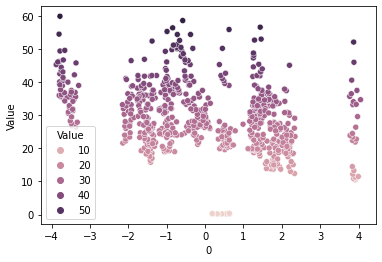

In [65]:
sns.scatterplot(data = pc_clu,y = "Value",x = 0,hue="Value")

<AxesSubplot:xlabel='1', ylabel='Value'>

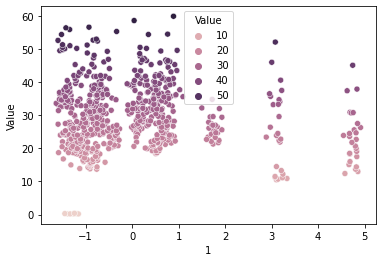

In [66]:
sns.scatterplot(data = pc_clu,y = "Value",x = 1,hue="Value")

In [67]:
def plot_pc(col_names, vt, k):
    plt.bar(col_names, vt[k, :], alpha=0.7)
    plt.xticks(col_names, rotation=90);

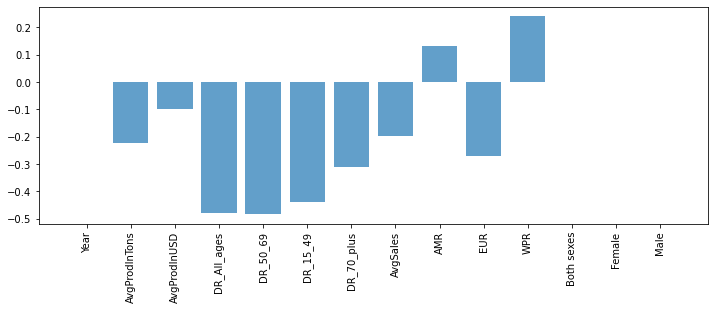

In [68]:
plt.figure(figsize=(12, 4))
plot_pc(list(feature_centered.columns), vt, 0);

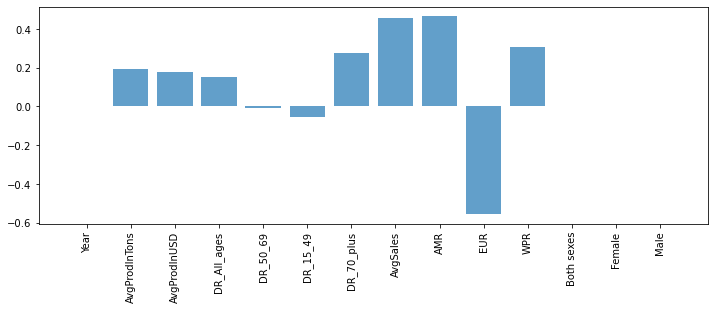

In [69]:
plt.figure(figsize=(12, 4))
plot_pc(list(feature_centered.columns), vt, 1);

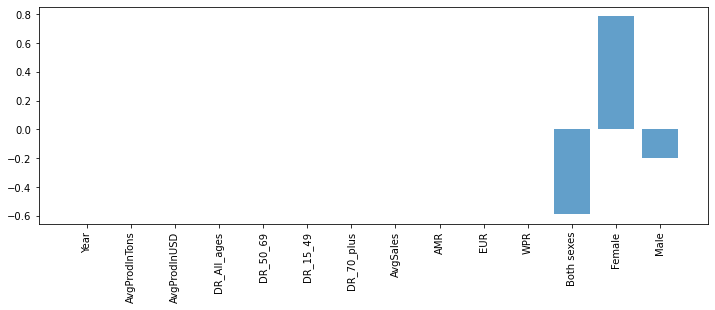

In [70]:
plt.figure(figsize=(12, 4))
plot_pc(list(feature_centered.columns), vt, 3);

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca = pca.fit(feature_centered)
comp = pca.components_
compx = comp[0]
compy = comp[1]
compz = comp[2]

In [72]:
feature_centered.columns[np.argmax(abs(compx))]

'DR_50_69'

In [73]:
feature_centered.columns[np.argmax(abs(compy))]

'EUR'

In [74]:
feature_centered.columns[np.argmax(abs(compz))]

'AvgProdInUSD'

In [76]:
from sklearn.cluster import KMeans
modcluster = KMeans(5)
modcluster = modcluster.fit(feature_centered)

In [77]:
from sklearn.cluster import KMeans
pcax=pca.fit_transform(feature_centered)
x_cluster = modcluster.fit_predict(pcax)
color_map = {0:'r',1:'b',2:'c',3:'m',4:'g'}
label_color = [color_map[l] for l in x_cluster]

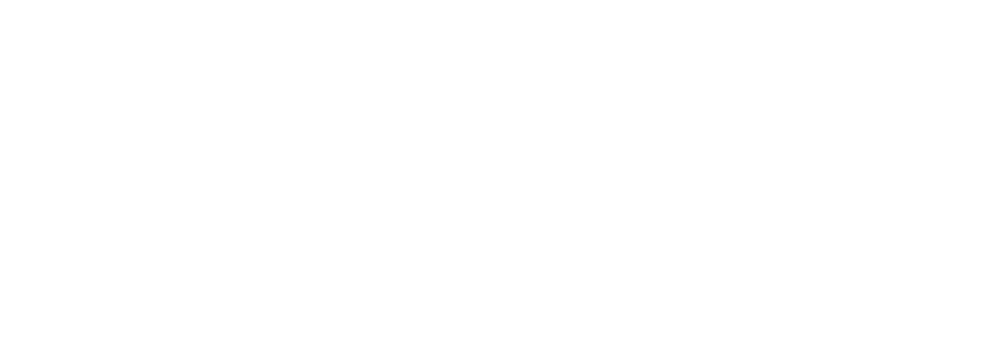

In [78]:
px.scatter_3d(pcax[:,0],pcax[:,1],pcax[:,2],color=label_color)

In [79]:
clusterdf = pd.DataFrame()
clusterdf['coordinatex']=[pcax[i][0] for i in range(len(pcax))]
clusterdf['coordinatey']=[pcax[i][1] for i in range(len(pcax))]
clusterdf['coordinatez']=[pcax[i][2] for i in range(len(pcax))]
clusterdf['cluster']= x_cluster
distance = (((clusterdf['coordinatex'])**2+(clusterdf['coordinatey'])**2 + (clusterdf["coordinatez"])**2)**0.5).astype(int).to_numpy()
clusterdf['distance']=distance

In [80]:
clusterdf

coordinatex  coordinatey  coordinatez  cluster  distance
0       0.456123    -1.244457    -0.496457        0         1
1       3.904118     3.139308    -1.945010        1         5
2       2.160720     4.774365    -0.638063        1         5
3       1.754583    -0.919984     0.145845        0         1
4       1.754583    -0.919984     0.145845        0         1
..           ...          ...          ...      ...       ...
697     0.456123    -1.244457    -0.496457        0         1
698    -0.777561    -1.456787    -1.293058        3         2
699     1.364719    -0.835688     2.499308        4         2
700    -0.489173     0.265791    -0.354284        3         0
701    -3.734196     0.845110    -0.105102        2         3

[702 rows x 5 columns]

In [81]:
clusterdf["Value"] = pc_clu["Value"]
clusterdf.groupby(['cluster']).mean()['Value']

cluster
0    25.841152
1    24.383333
2    37.872222
3    32.441111
4    30.637037
Name: Value, dtype: float64